# Trabalho Final da disciplina de Machine Learning

### Tipo de problema
NER - Named Entity Recognition.

Neste tipo de problema um modelo de predição para textos tentará predizer da melhor maneira possível quais são as entidades em um texto. Os problemas de NER surgem devido diversas maneiras de expressar uma determinada coisa e também onde uma coisa pode significar várias outras.
A Língua Portuguesa por exemplo possui muitos tempos verbais e maneiras de conjugação de verbos.

Ex: conjugar, conjugado, conjugaria, conjugarei, conjugaríamos, conjugaríeis, conjugaste, conjugou, conjuguemos...

Tente explicar por exemplo para um extrangeiro a diferença entre "bota a calça e calça a bota".

-

### Problema
O problema a ser resolvido com a resolução deste trabalho é utilizar um dataset com milhares de textos e palavras rotulados e a partir de um modelo de predições de texto, realizar o ranqueamento das melhores classificações de entidades.

Nós nos focaremos em 4 tipos de named entities: persons, locations, organizations e nomes de demais entidades que não pertençam as anteriores.

-

### Datasets
Será utilizado um dataset amplamente difundido que foi utilizado primariamente na Conference on Computational Natural Language Learning (CoNLL-2003) acessível a partir do seguinte link: https://www.clips.uantwerpen.be/conll2003/ner/

-

### Divisão do dataset - rows
Os arquivos de dados de tarefas compartilhadas CoNLL-2003 contêm quatro colunas separadas por um único espaço.

- O primeiro item de cada linha no dataset é uma palavra.  
- O segundo é um Part-of-Speech (POS) tag. 
- O terceiro é uma tag de fragmento sintático. 
- A quarta é a tag de entidade nomeada.

As tags de fragmento e os nomes de entidades tem o formato I-TYPE que significa que a palavra está dentro de uma frase do tipo TYPE.

 Uma palavra com a tag O não é parte de uma frase.

-

### Ferramenta
Será utilizado o [Spacy](https://spacy.io/)
 que é uma ferramenta para o emprego de técnicas de Processamento de Linguagem Natural - PLN. Será utilizado voltado ao NER - Named Entity Recognition.

O Spacy é uma ferramenta de código aberto muito poderosa que já possui diversos modelos prontos para uso para diversos idiomas.

Será utilizado o modelo para classificação de textos em inglês.

Algumas funções do spacy estão definidas mais abaixo no documento.

-

In [ ]:
#U.N.         NNP  I-NP  I-ORG 
#official     NN   I-NP  O 
#Ekeus        NNP  I-NP  I-PER 
#heads        VBZ  I-VP  O 
#for          IN   I-PP  O 
#Baghdad      NNP  I-NP  I-LOC 
#.            .    O     O 

-

### Divisão dos arquivos de dados
A divisão dos arquivos do dataset se dão da seguinte forma:
    - Consiste de 3 arquivos por linguagem
    - Um arquivo de treino
    - Dois arquivos de teste, testeA e testeB
    - O primeiro arquivo de teste será usado em produção para encontrar os melhores parametros
    - O segundo arquivo de teste será usado para a avaliação final
    - Os dados estão disponíveis em dois datasets, um em Inglês e também em Alemão. Para o propósito deste trabalho será usado apenas a versão em inglês.
   

-

### Arquivos
- eng.raw.tar   - 13,930 MB - Conjunto de dados em inglês
- ner.tgz       - 3,374  MB - Contém o software para fazer o build dos dados
- 000README.txt - 8      KB - Instruções para descompactação

Os dados em inglês são uma coleção de artigos de notícias do Reuters Corpus.

-

### Métricas de Avaliação
A competição utiliza três métricas principais que são:
- Precision
- Recall
- F-Score

Precision é a porcentagem de named entities encontradas pelo sistema de aprendizado que estão corretas.

Recall é a porcentagem de named entities presentes no Corpus que são encontradas pelo sistema.

Uma named entity só está correta se for uma correspondência exata da entidade correspondente no
arquivo de dados.

-

### Dados de treino: Exemplos e suas anotações.

### Texto: O texto de entrada para o qual o modelo deve prever um rótulo.

### Label: O label que o modelo deve predizer

### Gradient: Gradient da função de perca calculando a diferença entre a entrada e a saída esperada

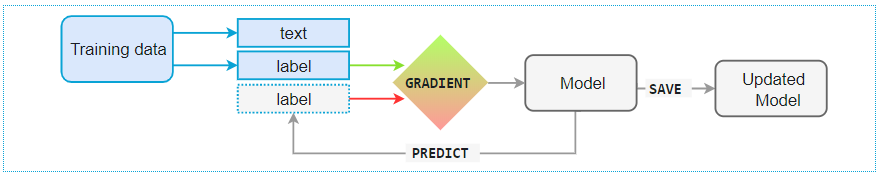

In [46]:
from IPython.display import Image
Image(filename="training model.png")

-

## Importando bibliotecas

In [107]:
import spacy
from spacy import displacy
from spacy.tokens import Span, Doc
from spacy.vocab import Vocab
from spacy.pipeline import EntityRuler
from spacy.lang.en import English

from sklearn.metrics import classification_report

import numpy as np 
import random

In [22]:
nlp = spacy.load("en_core_web_sm")

In [23]:
doc = nlp(u"Apple is looking at buying U.K. startup for $1 billion")
spacy.displacy.render(doc, style='ent', jupyter=True)

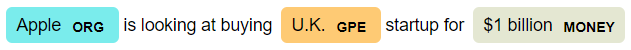

In [358]:
Image(filename="entidades.png")

In [24]:
doc_dep = nlp(u"This is a sentence.")
displacy.serve(doc_dep, style="dep")

C:\Users\Jonas Lopes\Anaconda3\lib\runpy.py:193: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  "__main__", mod_spec)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


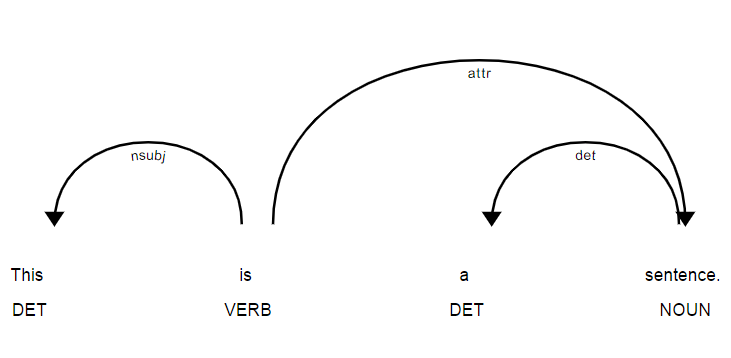

In [359]:
Image(filename="dependencia.png")

-

## Treinando e atualizando modelos de rede neural

In [ ]:
nlp = spacy.load("en_core_web_sm")
train_data = [(u"Uber blew through $1 million", {"entities": [(0, 4, "ORG")]})]

other_pipes = [pipe for pipe in nlp.pipe_names if pipe != "ner"]

with nlp.disable_pipes(*other_pipes):
    optimizer = nlp.begin_training()
    for i in range(10):
        random.shuffle(train_data)
        for text, annotations in train_data:
            nlp.update([text], [annotations], sgd=optimizer)
            
# salvando o modelo no disco         
nlp.to_disk("models/modelo.bin")
# trazendo o modelo de volta ao disco
nlp = spacy.load("models/modelo.bin")

In [10]:
# utilizando o novo modelo
eng_testa = open("dados/eng.testb.txt").read()
doc = nlp(eng_testa)

-

## Serialização simples e eficiente

In [ ]:
from spacy.tokens import Doc
from spacy.vocab import Vocab

nlp = spacy.load("en_core_web_sm")
saida = open("dados/eng.testb.txt").read()
doc = nlp(saida)

doc.to_disk("dados/saida.bin")

new_doc = Doc(Vocab()).from_disk("dados/saida.bin")

new_doc.ents

In [ ]:
spacy.explain("dobj")

-

## Matcher Pattern

In [12]:
# Matcher para palavras

# Matcher is initialized with the shared vocab
from spacy.matcher import Matcher

# Each dict represents one token and its attributes
matcher = Matcher(nlp.vocab)

# Add with ID, optional callback and pattern(s)
pattern = [{"LOWER": "new"}, {"LOWER": "york"}]
matcher.add('CITIES', None, pattern)

# Match by calling the matcher on a Doc object
doc = nlp("I live in New York")
matches = matcher(doc)

# Matches are (match_id, start, end) tuples
for match_id, start, end in matches:
     # Get the matched span by slicing the Doc
    span = doc[start:end]
    print(span.text)
# 'New York'

New York


-

## Utilizando Match Pattern para criar um modelo de NER com Spacy

In [385]:
train = open("dados/eng.train.txt").read()
train = train.split()
len(train)
# O spacy só aceita por vez 100000 caracteres

818268

In [386]:
#Tentativa com arquivo de treino
nlp = English();
ruler = EntityRuler(nlp)
patterns = []
i = 0

while(i <= len(train)-4):
    if train[i] == '-DOCSTART-':
        i += 4
    #print("Pattern",train[i] + " Label",train[i+3])   
    patterns += [{"label": train[i+3], "pattern" : train[i]}]

    i += 4

ruler.add_patterns(patterns)

#adicionando o pipe ruler dentro do nlp
nlp.add_pipe(ruler)

In [387]:
# Enviando o ruler para o disco e salvando-o.
ruler.to_disk("models/patterns.json")
nlp.to_disk("models/modelo.bin")

In [ ]:
# Adicionando pipe com um modelo do zero
nlp = English()

ruler_disk = EntityRuler(nlp).from_disk("models/patterns.json")

nlp.add_pipe(ruler_disk)

In [2]:
# carregando o modelo criado a partir do disco
nlp = spacy.load("models/modelo.bin")

In [3]:
doc = nlp(u"Uber blew through $1 million")
print([(ent.text, ent.label_) for ent in doc.ents])

[('blew', 'O'), ('through', 'O'), ('$', 'O'), ('1', 'I-MISC'), ('million', 'O')]


In [4]:
doc = nlp(u"Peter is a good guy")
print([(ent.text, ent.label_) for ent in doc.ents])

[('Peter', 'I-PER'), ('is', 'I-MISC'), ('a', 'O'), ('good', 'O'), ('guy', 'O')]


# Avaliando com as métricas do CoNLL

O CoNNL trabalha com o EM - Exact Match utilizando a precision e recall
 - Onde precision como mostrado no início , é a porcentagem de NEs encontradas pelo sistema que estão corretas
 - e o recall que é a porcentagem de NEs na solução que são encontradas pelo sistema.
 - Uma NE só está correta se é uma combinação exata da entidade na solução.

- ### Antes de mais nada, um exemplo para melhor entendimento

Digamos que tenhamos as seguintes anotações de treino corretas

Unlike <ENAMEX TYPE="PERSON">Robert</ENAMEX>, <ENAMEX TYPE="PERSON">John
Briggs Jr</ENAMEX> contacted <ENAMEX TYPE="ORGANIZATION">Wonderful
Stockbrockers Inc</ENAMEX> in <ENAMEX TYPE="LOCATION">New York</ENAMEX> and
instructed them to sell all his shares in <ENAMEX
TYPE="ORGANIZATION">Acme</ENAMEX>. 

Vamos supor que um sistema produziu as seguintes saídas

<ENAMEX TYPE="LOCATION">Unlike</ENAMEX> Robert, <ENAMEX
TYPE="ORGANIZATION">John Briggs Jr</ENAMEX> contacted Wonderful <ENAMEX
TYPE="ORGANIZATION">Stockbrockers</ENAMEX> Inc <TIMEX TYPE="DATE">in New
York</TIMEX> and instructed them to sell all his shares in <ENAMEX
TYPE="ORGANIZATION">Acme</ENAMEX>. 

- ### O sistema gera os seguintes erros:

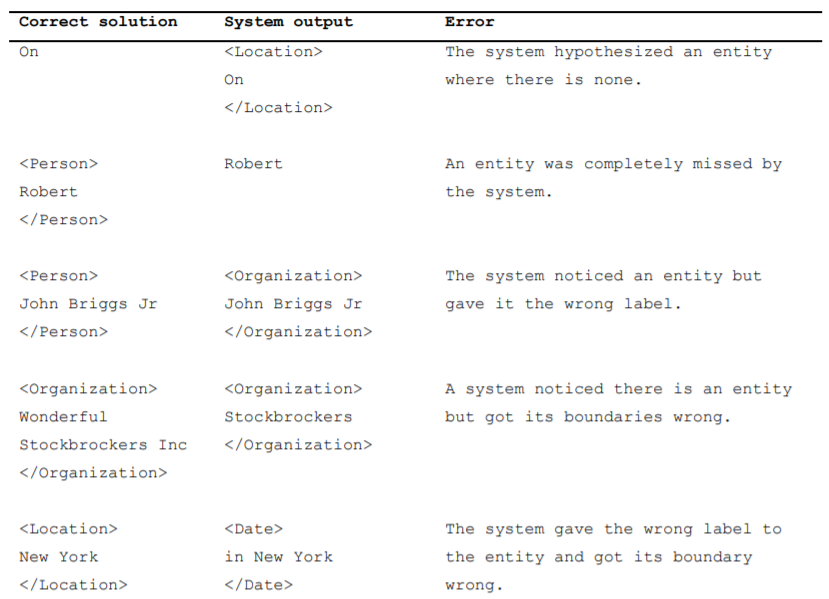

In [16]:
Image(filename="saidas eplicar.png", width=700, height=500)

Para o exemplo acima, existem 5 entidades verdadeiras, 5 palpites do sistema onde somente um desses palpites combina exatamente com a solução:  <Organization> Acme </Organization>
A precision é então 20% (1/5)
A recall é também 20% (1/5) 

## Utilizando as métricas

- Primeiro vamos definir o texto em uma string normal Python para entao manipularmos com o nosso modelo criado

In [362]:
testa =     u"""-DOCSTART- -X- O O
                BASEBALL NNP I-NP O
                - : O O
                KEVIN NNP I-NP I-PER
                BROWN NNP I-NP I-PER
                LOWERS NNP I-NP O
                ERA NNP I-NP I-MISC
                AS NNP I-NP O
                MARLINS NNP I-NP I-ORG
                BEAT NN I-INTJ O
                REDS NNS I-NP I-ORG
                . . O O

                CINCINNATI NNP I-NP I-LOC
                1996-08-31 NNP I-NP O

                Major JJ I-NP O
                league NN I-NP O
                ERA NNP I-NP I-MISC
                leader NN I-NP O
                Kevin NNP I-NP I-PER
                Brown NNP I-NP I-PER
                threw VBD I-VP O
                an DT I-NP O
                eight-hitter NN I-NP O
                and CC O O
                Devon NNP I-NP I-PER
                White NNP I-NP I-PER
                's POS B-NP O
                RBI NNP I-NP I-MISC
                double VB I-VP O
                snapped VBN I-VP O
                a DT I-NP O
                fifth-inning NN I-NP O
                tie NN I-NP O
                as IN I-SBAR O
                the DT I-NP O
                Florida NNP I-NP I-ORG
                Marlins NNP I-NP I-ORG
                beat VBD I-VP O
                the DT I-NP O
                Cincinnati NNP I-NP I-ORG
                Reds NNP I-NP I-ORG
                3-1 CD I-NP O
                for IN I-PP O
                their PRP$ I-NP O
                seventh JJ I-NP O
                straight JJ I-NP O
                win NN I-NP O
                Friday NNP B-NP O
                . . O O

                Brown NNP I-NP I-PER
                ( ( O O
                14-10 CD I-NP O
                ) ) O O
                tied VBD I-VP O
                Todd NNP I-NP I-PER
                Stottlemyre NNP I-NP I-PER
                of IN I-PP O
                the DT I-NP O
                Cardinals NNPS I-NP I-ORG
                for IN I-PP O
                the DT I-NP O
                National NNP I-NP I-MISC
                League NNP I-NP I-MISC
                lead NN I-NP O
                with IN I-PP O
                his PRP$ I-NP O
                fifth JJ I-NP O
                complete JJ I-NP O
                game NN I-NP O
                and CC O O
                lowered VBD I-VP O
                his PRP$ I-NP O
                major JJ I-NP O
                league-leading JJ I-NP O
                earned VBD I-VP O
                run VBN I-VP O
                average JJ I-NP O
                from IN I-PP O
                1.96 CD I-NP O
                to TO I-PP O
                1.92 CD I-NP O
                . . O O"""

In [361]:
testa = open("dados/eng.testa.txt").read()

- Após isso utilizamos a função split para realizar a separação dos tokens, onde cada palavra será separada e adicionada a uma lista Python

In [363]:
testa = testa.split()
len(testa)

328

- Feito isto poderemos utilizar um numpy array para facilitar a comparação a posteriori das entidades corretas do arquivo de teste, com as entidades preditas pelo nosso modelo
- Para isso iremos ignorar as palavras marcadas como 'O', já que elas não sao entidades

In [364]:
# Entidades corretas do dado de teste
correct_ent = [['                                       ','                                       ']]
correct_ent = np.array(correct_ent)
correct_ent = np.delete(correct_ent, np.s_[:1], axis=0)

i = 0

while(i <= len(testa)-4):
    if testa[i] == '-DOCSTART-':
        i += 4
        
    if testa[i+3] != 'O':   
        correct_ent = np.insert(correct_ent, len(correct_ent), [testa[i], testa[i+3]], axis=0)

    i += 4

- Temos agora um numpy array com as entidades corretas que serão utilizadas para comparação com as predições
- Na célula abaixo iremos criar uma string pegando apenas a primeira posição de cada linha ou seja, a palavra. Colocando todas as palavras em uma string criaremos um "documento", assim chamado pelo spacy que será usado como entrada para o modelo

In [366]:
# Colocando o texto em uma String para poder usar nlp do spacy
testa_doc = ''

i = 0

while(i <= len(testa)-4):
    if testa[i] == '-DOCSTART-':
        i += 4
        
    testa_doc += testa[i]
    testa_doc += ' '
        
    i += 4

In [367]:
# 500 primeiros caracteres
testa_doc[:500]

"BASEBALL - KEVIN BROWN LOWERS ERA AS MARLINS BEAT REDS . CINCINNATI 1996-08-31 Major league ERA leader Kevin Brown threw an eight-hitter and Devon White 's RBI double snapped a fifth-inning tie as the Florida Marlins beat the Cincinnati Reds 3-1 for their seventh straight win Friday . Brown ( 14-10 ) tied Todd Stottlemyre of the Cardinals for the National League lead with his fifth complete game and lowered his major league-leading earned run average from 1.96 to 1.92 . "

In [368]:
# tamanho da String
len(testa_doc)

475

- Chamamos então a função  nlp que é responsável por atribuir a um documento as palavras e suas entidades preditas pelo modelo

In [370]:
doc = nlp(testa_doc)
predicted_ent = [(ent.text, ent.label_) for ent in doc.ents]

In [371]:
doc.ents[0].text, doc.ents[0].label_

('BASEBALL', 'O')

- O modelo foi treinando utilizando as anotações 'O', como dito acima não precisaremos delas já que não são entidades.
- Utilizaremos um laço para remover as palavras anotadas com 'O' e adicionaremos as restantes em um numpy array do mesmo tipo das entidades corretas

In [372]:
# Transformando as entidades preditas no mesmo formato das entidades corretas
predicted_ent = [['                                       ','                                       ']]
predicted_ent = np.array(predicted_ent)
predicted_ent = np.delete(predicted_ent, np.s_[:1], axis=0)

i = 0

while(i <= len(doc.ents)-1):
        
    if doc.ents[i].label_ != 'O':   
        predicted_ent = np.insert(predicted_ent, len(predicted_ent), [doc.ents[i].text, doc.ents[i].label_], axis=0)
    i += 1

In [373]:
correct_ent[:20]

array([['KEVIN', 'I-PER'],
       ['BROWN', 'I-PER'],
       ['ERA', 'I-MISC'],
       ['MARLINS', 'I-ORG'],
       ['REDS', 'I-ORG'],
       ['CINCINNATI', 'I-LOC'],
       ['ERA', 'I-MISC'],
       ['Kevin', 'I-PER'],
       ['Brown', 'I-PER'],
       ['Devon', 'I-PER'],
       ['White', 'I-PER'],
       ['RBI', 'I-MISC'],
       ['Florida', 'I-ORG'],
       ['Marlins', 'I-ORG'],
       ['Cincinnati', 'I-ORG'],
       ['Reds', 'I-ORG'],
       ['Brown', 'I-PER'],
       ['Todd', 'I-PER'],
       ['Stottlemyre', 'I-PER'],
       ['Cardinals', 'I-ORG']], dtype='<U39')

In [374]:
predicted_ent[:20]

array([['ERA', 'I-MISC'],
       ['.', 'I-LOC'],
       ['CINCINNATI', 'I-ORG'],
       ['1996', 'I-MISC'],
       ['31', 'I-LOC'],
       ['Major', 'I-MISC'],
       ['ERA', 'I-MISC'],
       ['Kevin', 'I-PER'],
       ['Brown', 'I-PER'],
       ['and', 'I-LOC'],
       ['Devon', 'I-PER'],
       ['White', 'I-LOC'],
       ["'s", 'I-LOC'],
       ['RBI', 'I-MISC'],
       ['the', 'I-LOC'],
       ['Florida', 'I-LOC'],
       ['Marlins', 'I-ORG'],
       ['the', 'I-LOC'],
       ['Cincinnati', 'I-ORG'],
       ['Reds', 'I-ORG']], dtype='<U39')

In [375]:
compare = correct_ent[1] == predicted_ent[1]
if compare[0] and compare[1]:
    print("exact match!")

In [376]:
compare

array([False, False])

#### Agora iremos calcular a precision e a recall a partir das duas listas: correct_ent e predicted_ent

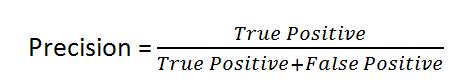

In [118]:
Image(filename="precision.png", width=500, height=500)

In [380]:
TP = 0
FP = 0
FN = 0

for i in range(0, len(correct_ent)):
    for j in range(0, len(predicted_ent)):
        compare = correct_ent[i] == predicted_ent[j]
        if compare[0] and compare[1]:
            TP += 1
        elif compare[0] == True and compare[1] == False:
            FP += 1
            
FN = len(predicted_ent) - TP - FP

In [381]:
print("True Positives:",TP)
print("False Positives:",FP)
print("False Negatives:",FN)

True Positives: 18
False Positives: 4
False Negatives: 14


In [382]:
precision = 0
precision = TP / (TP + FP)
precision

0.8181818181818182

#### Cálculo do Recall

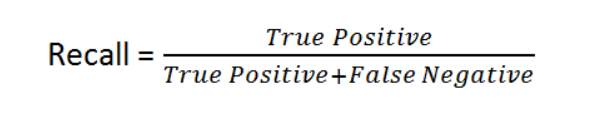

In [53]:
Image(filename="recall.png", width=500, height=500)

- Somente pare relembrar, o recall para o CoNNL é a porcentagem de entidades nomeadas - NE na solução, que foram encontradas pelo sistema

In [383]:
recall = 0
recall = TP / (TP + FN)
recall

0.5625

#### Por fim calcularemos o F-measure amenizando as duas métricas calculadas

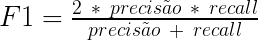

In [254]:
Image(filename="fscore.png", width=400, height=400)

In [384]:
F1_score = 2 * (precision * recall) / (precision + recall)
F1_score

0.6666666666666666

# Com isso podemos perceber que o sistema está com resultados regulares, mas ainda é necessário reexecutá-lo utilizando todos os dados de teste, utilizando ferramentas que forneçam maior processamento e memória.

-